# Guided Project: Visualizing Real World Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Select and Upload Dataset
**Use a composed dataset from kaggle, join and cleanup the data (the requirements here is to open at least 2 files, it doesn’t matter if its csv or json)**

I went to Kaggle and selected the [Mobile App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) dataset, which I ensured had at least 2 files. This datasets contained more than 7000 Apple iOS mobile application and their details.

In [2]:
data1 = pd.read_csv('data/AppleStore.csv')
data2 = pd.read_csv('data/appleStore_description.csv')
data = pd.merge(data1, data2, on="id")
data.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


## Step 2: Data Cleaning
- I started to explore the dataset using the info command to get an idea of the data types and the nulls
    - Since there were no nulls in the dataset, I kept all colums and rows based on this filter

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 20 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name_x        7197 non-null object
size_bytes_x        7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
track_name_y        7197 non-null object
size_bytes_y        7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(10), object(7)
memory usage: 1.2+ MB


- I proceded to verify if the following columns contained the same information:
    - track_name_x and track_name_y
    - size_bytes_x and size_bytes_y
        - Since they both contained the same information:
            - I dropped columns track_name_x and size_bytes_x
            - I renamed columns track_name_y and size_bytes_y
- I as well dropped the Unnamed: 0 column
- I verified the changes were executed correctly using the info command 

In [4]:
print(sum((data.track_name_x == data.track_name_y)==True))
print(sum((data.size_bytes_x == data.size_bytes_y)==True))

7197
7197


In [5]:
data = data.drop(['size_bytes_x', 'track_name_x', 'Unnamed: 0'], axis=1)

In [6]:
data = data.rename(columns={'size_bytes_y':'size_bytes',
                            'track_name_y':'track_name'})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 17 columns):
id                  7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 1012.1+ KB


- I changed the data types of the following columns:
    - id to object
    - prime_genre to category
    - vpp_lic to category
    - cont_rating to int64 
        - In order to change the data type  from object to int64, I had to remove the + in the data 
- I used the dtypes command to verify the data types where changed

In [8]:
data['id'] = data['id'].astype('object')
data['prime_genre'] = data['prime_genre'].astype('category')
data['vpp_lic'] = data['vpp_lic'].astype('category')

In [9]:
data['cont_rating'] = data['cont_rating'].str.replace('+', '')
data['cont_rating'] = data['cont_rating'].astype('int64')

In [10]:
data.dtypes

id                    object
currency              object
price                float64
rating_count_tot       int64
rating_count_ver       int64
user_rating          float64
user_rating_ver      float64
ver                   object
cont_rating            int64
prime_genre         category
sup_devices.num        int64
ipadSc_urls.num        int64
lang.num               int64
vpp_lic             category
track_name            object
size_bytes             int64
app_desc              object
dtype: object

## Step 3: Preliminaty Analysis 
- I started the preliminary analysis using the describe command and creating a correlation matrix

In [11]:
data.describe()

,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,size_bytes
count,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7.197000e+03
mean,1.726218,1.289291e+04,460.373906,3.526956,3.253578,7.093094,37.361817,3.707100,5.434903,1.991345e+08
std,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,4.329046,3.737715,1.986005,7.919593,3.592069e+08
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000,9.000000,0.000000,0.000000,5.898240e+05
25%,0.000000,2.800000e+01,1.000000,3.500000,2.500000,4.000000,37.000000,3.000000,1.000000,4.692275e+07
50%,0.000000,3.000000e+02,23.000000,4.000000,4.000000,4.000000,37.000000,5.000000,1.000000,9.715302e+07
75%,1.990000,2.793000e+03,140.000000,4.500000,4.500000,9.000000,38.000000,5.000000,8.000000,1.819249e+08
max,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,17.000000,47.000000,5.000000,75.000000,4.025970e+09


In [12]:
data.corr()

,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,size_bytes
price,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.029666,-0.115361,0.066100,-0.006713,0.182392
rating_count_tot,-0.039044,1.000000,0.163645,0.083310,0.088744,0.009139,0.008832,0.015734,0.137675,0.004486
rating_count_ver,-0.018012,0.163645,1.000000,0.068754,0.077840,0.001435,0.037951,0.024333,0.013287,0.006337
user_rating,0.046601,0.083310,0.068754,1.000000,0.774140,-0.097999,-0.042451,0.265671,0.170976,0.066256
user_rating_ver,0.025173,0.088744,0.077840,0.774140,1.000000,-0.120357,-0.018901,0.275737,0.175580,0.086075
cont_rating,-0.029666,0.009139,0.001435,-0.097999,-0.120357,1.000000,0.020085,-0.107726,-0.069508,0.140541
sup_devices.num,-0.115361,0.008832,0.037951,-0.042451,-0.018901,0.020085,1.000000,-0.037728,-0.041681,-0.118347
ipadSc_urls.num,0.066100,0.015734,0.024333,0.265671,0.275737,-0.107726,-0.037728,1.000000,0.088378,0.152697
lang.num,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.069508,-0.041681,0.088378,1.000000,0.004614
size_bytes,0.182392,0.004486,0.006337,0.066256,0.086075,0.140541,-0.118347,0.152697,0.004614,1.000000


## Step 4: Histograms
**At least 3 histograms on different aggregated data. Do an analysis on which is the optimal bin parameter (the one that maximizes clarity on specified insight). Keep an eye on the dataset you choose, it must have at least 3 numeric columns to operate.**

### Histogram 1: user_rating
- I created a histogram for user_rating
    - Since I knew user_rating went from 0 to 5, I the value_counts command to better understand the data. Since the ratings went from 0 to 5 in 0.5 counts, I decided to use 10 bins.
- From the histogram I learned that most apps have a total rating between 4 and 5.

In [13]:
data.user_rating.value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

Text(0.5, 1.0, 'User Rating for Applications')

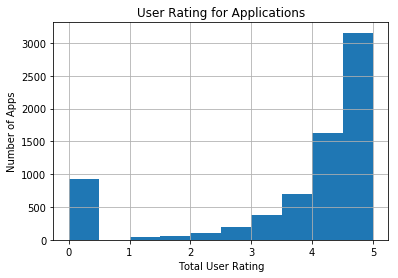

In [14]:
data.user_rating.hist(bins=10)
plt.xlabel("Total User Rating")
plt.ylabel("Number of Apps")
plt.title('User Rating for Applications')

### Histogram 2: price
- I created a histogram for price
   - I started by verifying that all the apps where in the same currency using the value.counts command
   - From the Preliminary Analysis, I knew price had extreme values. Therefore, I created a boxplot for the column to better understand the data and proceed to eliminate the extreme values. 
   - I considered as extreme values, apps that had a value of more than 10 USD. Therefore, I created a new dataframe data_priceless10, without the extreme values. 
   - The new data frame eliminated only 97 of 7000 entries and allowed the creation of a histogram that could actually be analized. 
- From the histogram I learned that most apps have a price of less than 1 USD.

In [15]:
data.currency.value_counts()

USD    7197
Name: currency, dtype: int64

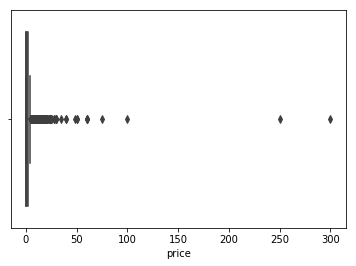

In [16]:
sns.boxplot(x=data['price'])

In [17]:
price_less_10 = data['price']<=10
data_priceless10 = data[price_less_10]
print(data_priceless10.shape)

(7100, 17)


Text(0.5, 1.0, 'Price for Applications')

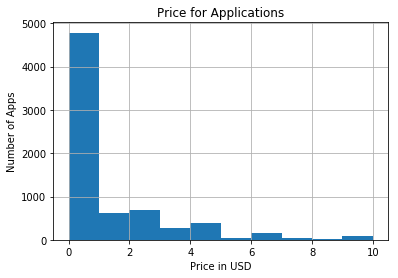

In [18]:
data_priceless10['price'].hist(bins=10)
plt.xlabel("Price in USD")
plt.ylabel("Number of Apps")
plt.title("Price for Applications")

### Histogram 3: cont_rating
- I created a histogram for cont_rating
    - From the Preliminary Analysis, I knew cont_rating had a minumum value of 4 and maximum value of 17. 
    - I used the value_counts command to understand the data. The content ratings had values of 4, 9, 12 and 17 I decided to use 10 bins since they represented the data more accurately. 
- From the histogram I leaned that most apps have a content rating of 4.

In [21]:
data.cont_rating.value_counts()

4     4433
12    1155
9      987
17     622
Name: cont_rating, dtype: int64

Text(0.5, 1.0, 'Content Rating for Applications')

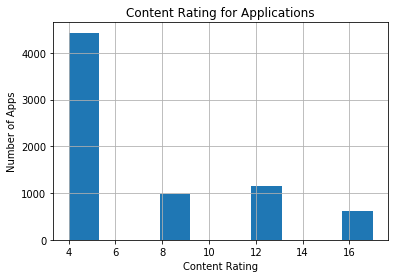

In [22]:
data.cont_rating.hist(bins=10)
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.title("Content Rating for Applications")

## Step 5: Scatter Distribution
**Plot a scatter distribution of data for a joined column with any column you like**
- The only numerical variable in the second data set was size_bytes. Therefore, I did a scatterplot of size_bytes and price since they were the two with highest correlation according to the correlation matrix.
- The Scatterplot shows that as I had learned in the correlation matrix, the correlation between the two variables is very low. The price of an app does not necessarily increase as size in bites increases.

Text(0.5, 1.0, 'Price vs. Size in Bytes')

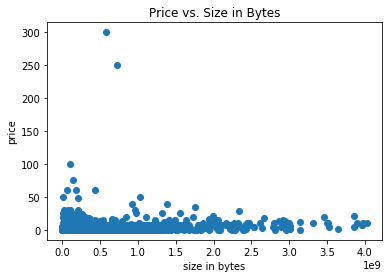

In [34]:
plt.scatter(x=data['size_bytes'], y=data['price'])
plt.xlabel("size in bytes")
plt.ylabel("price")
plt.title("Price vs. Size in Bytes")

## Step 6: Combined Scatterplot
**Create a combined scatterplot with a two series you choosed, it should contain the legend for each scatterplot**
- I created a combined scatter plot by creating two separate scatterplots and printing them together
- I used price as the y-variable
- I used user_rating and user_rating_ver as the x-variables

True


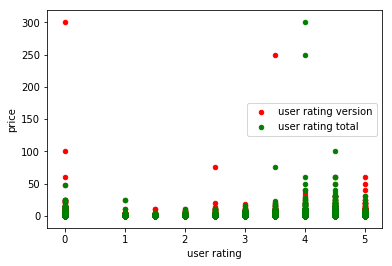

In [46]:
ax1 = data.plot(kind='scatter', x='user_rating_ver', y='price', color='r', label='user rating version')
ax2 = data.plot(kind='scatter', x='user_rating', y='price', color='g', ax=ax1, label='user rating total')
plt.xlabel("user rating")
plt.ylabel("price")
print(ax1 == ax2)

## Step 6: Plot for Category Distribution
**Create a plot for a category distribution (using seaborn violin plot o other kind of graph that fits better your data using catplot) https://seaborn.pydata.org/generated/seaborn.catplot.html**

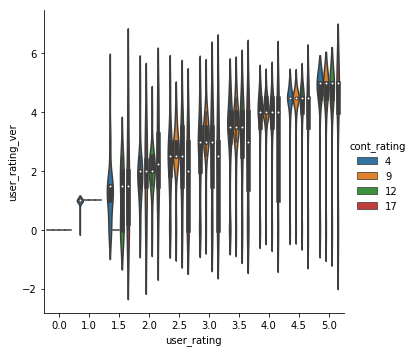

In [71]:
sns.catplot(x="user_rating", y="user_rating_ver", hue="cont_rating", data=data, kind="violin")

## Step 7: Subplot Matrix
**Do a comparision with 3x3 subplot matrix. Plots can be anything you liked about the dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121631ba8>,
      dtype=object)

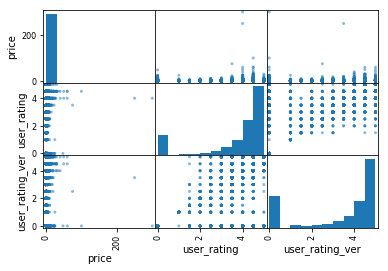

In [66]:
pd.plotting.scatter_matrix(data[['price', 'user_rating', 'user_rating_ver']])